
 

# PROJECT TITLE:“Car price prediction using Linear Regression”

 







# 
# 



# Data found in https://www.kaggle.com/

# 
# 


# Import important Libraries


In [132]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [133]:
print(os.getcwd())

C:\Users\michalis\Documents\aidl\μαθήματα\ai_ml\project


# Read csv file 

In [134]:
data = pd.read_csv("car data.csv")
print(data.shape)

(301, 9)


In [135]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [136]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [137]:
data.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [138]:
data = data.dropna()
data.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [139]:
data.describe()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Print data types

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.5+ KB


C:\Users\michalis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Present_Price', ylabel='Density'>

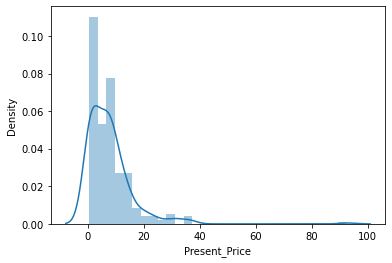

In [141]:
sns.distplot(data['Present_Price'], bins=30)

# Get the Histograms of int and float types features

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Selling_Price'}>],
       [<AxesSubplot:title={'center':'Present_Price'}>,
        <AxesSubplot:title={'center':'Kms_Driven'}>],
       [<AxesSubplot:title={'center':'Owner'}>, <AxesSubplot:>]],
      dtype=object)

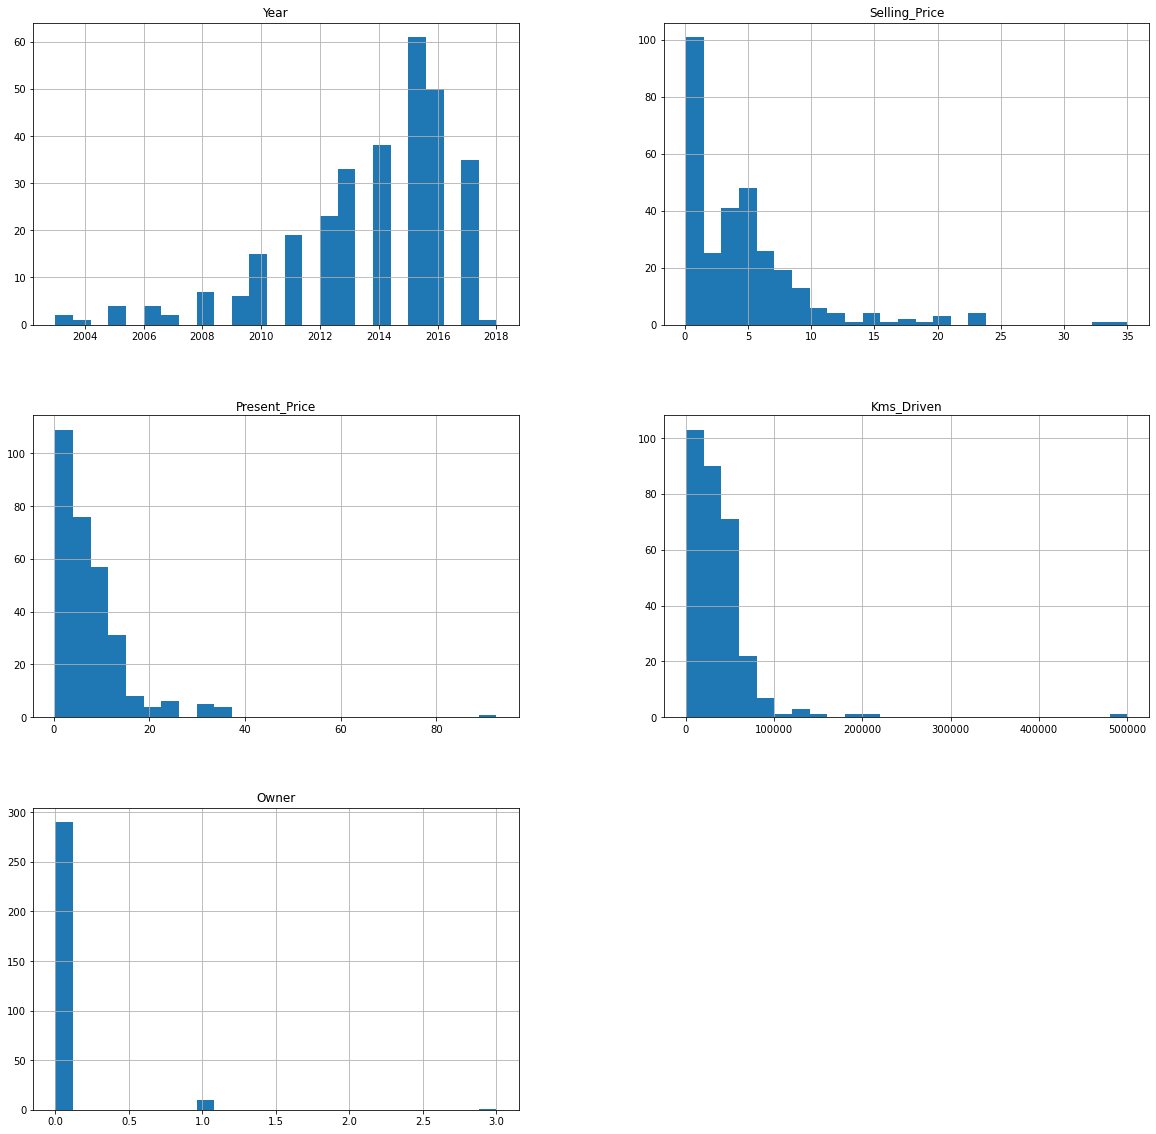

In [142]:
data.hist(bins=25, figsize=(20, 20))


# 
# 
# Get the Histograms of object type features




## Types of Fuels Histogram

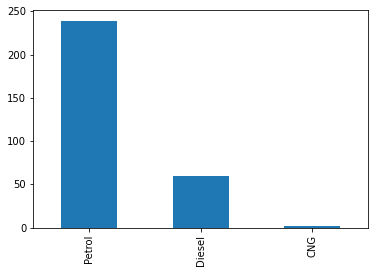

In [143]:
data.Fuel_Type.value_counts().plot(kind='bar');

## Transmission system Histogram

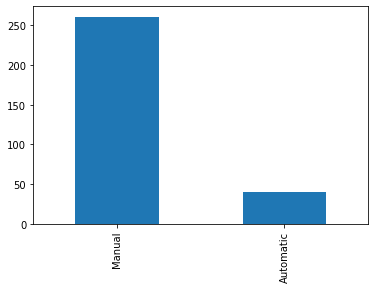

In [144]:
data.Transmission.value_counts().plot(kind='bar');

## Owners Histogram

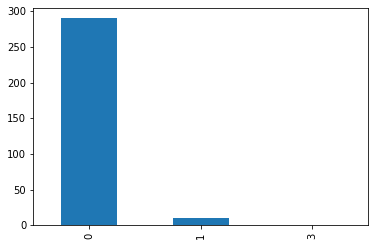

In [145]:
data.Owner.value_counts().plot(kind='bar');

# Separate Categorical Features from Continues
# Define inputs/outputs

In [146]:


cat_cols = ['Year', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
inputs = ['Year','Selling_Price','Fuel_Type','Seller_Type','Transmission','Owner']
output = ['Present_Price']



# Categorical data conversion

In [147]:
for i in cat_cols:
        data[i] = data[i].astype('category').cat.codes


# Print some examples of the new Table

In [148]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,11,3.35,5.59,27000,2,0,1,0
1,sx4,10,4.75,9.54,43000,1,0,1,0
2,ciaz,14,7.25,9.85,6900,2,0,1,0
3,wagon r,8,2.85,4.15,5200,2,0,1,0
4,swift,11,4.60,6.87,42450,1,0,1,0


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Selling_Price'}>,
        <AxesSubplot:title={'center':'Present_Price'}>],
       [<AxesSubplot:title={'center':'Kms_Driven'}>,
        <AxesSubplot:title={'center':'Fuel_Type'}>,
        <AxesSubplot:title={'center':'Seller_Type'}>],
       [<AxesSubplot:title={'center':'Transmission'}>,
        <AxesSubplot:title={'center':'Owner'}>, <AxesSubplot:>]],
      dtype=object)

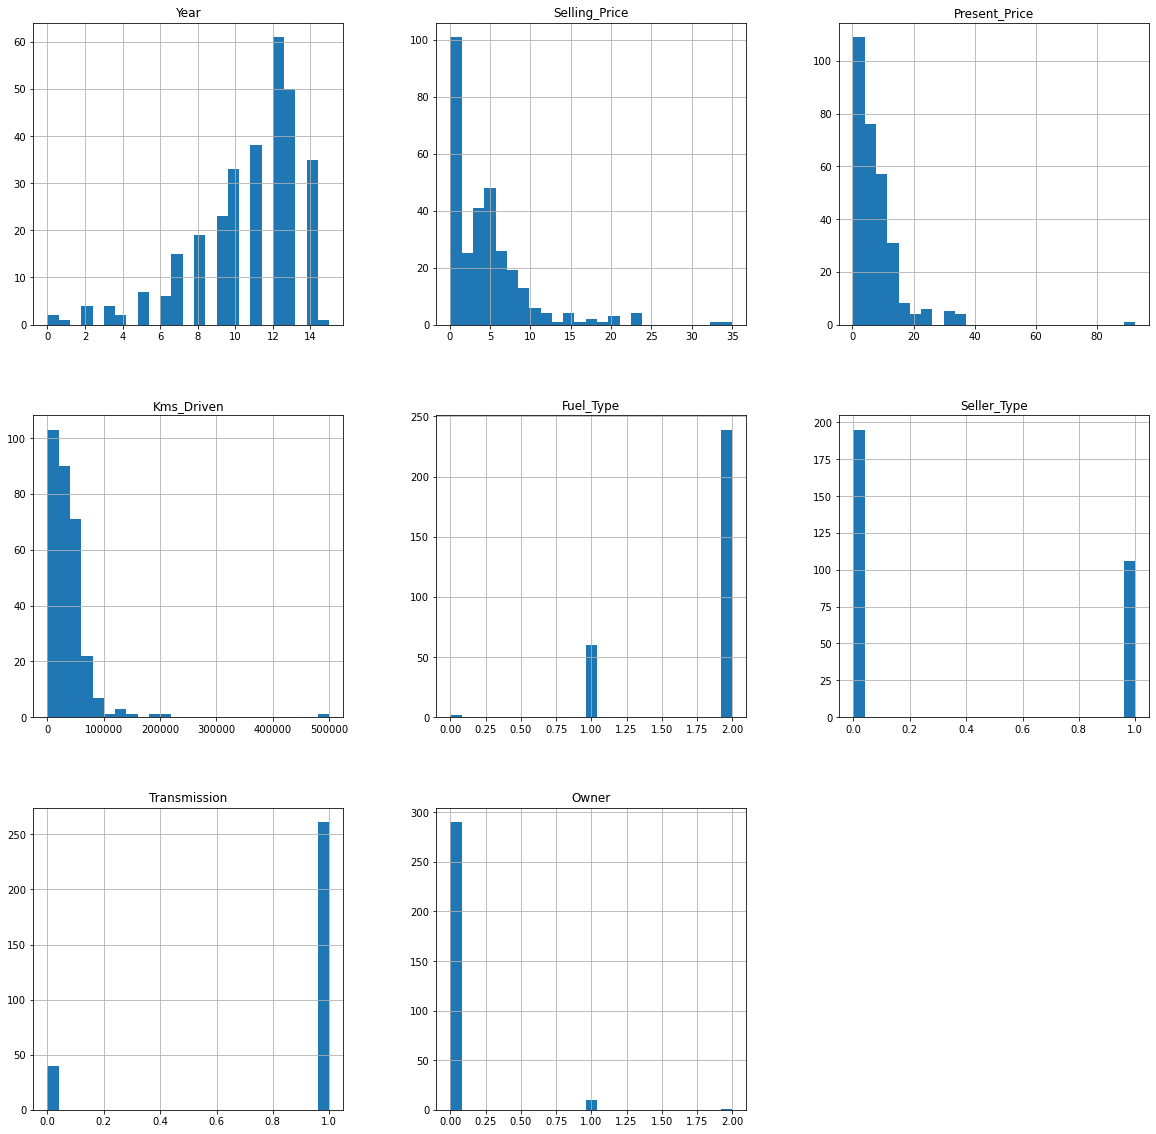

In [149]:
data.hist(bins=25, figsize=(20, 20))

In [150]:
X = data[inputs]
y = data[output]

# Split data in train and test set

In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=21)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(225, 6)
(76, 6)
(225, 1)
(76, 1)


# Import Linear Regression model

In [152]:
from sklearn.linear_model import LinearRegression

In [153]:
linregressor = LinearRegression()

# Train the Model

In [154]:
linregressor.fit(X_train, y_train)

LinearRegression()

In [155]:
print('Coefficients:',linregressor.coef_)
print('Intercept:',linregressor.intercept_)


Coefficients: [[-0.88247091  1.64496353  0.47627755  0.14310461  0.1858726   2.06647125]]
Intercept: [8.22298448]


In [156]:
print(linregressor.intercept_)
print(linregressor.coef_)
print(inputs)

[8.22298448]
[[-0.88247091  1.64496353  0.47627755  0.14310461  0.1858726   2.06647125]]
['Year', 'Selling_Price', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']


# Compute Mean Absolute Error, R2 Score

In [157]:

#https://scikit-learn.org/stable/modules/model_evaluation.html
#https://www.dataquest.io/blog/learning-curves-machine-learning/
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

y_pred_test = linregressor.predict(X_test)

# mean absolute error
mae=metrics.mean_absolute_error(y_test, y_pred_test)
# r-squared score του μοντέλου
r2 = r2_score(y_test, y_pred_test)
linregressor.score(X_test, y_test)

print("Metrics")
print("--------------------------------------")
print('Mean Absolute Error= ', mae)  
print('R2 score = ',linregressor.score(X_test, y_test))

Metrics
--------------------------------------
Mean Absolute Error=  2.140828165770602
R2 score =  0.8455810057811847


# Plot Present price Prediction graph

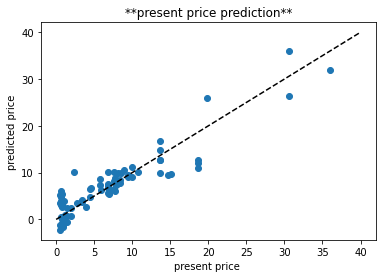

In [158]:
plt.scatter(y_test, y_pred_test)

plt.plot([0, 40], [0, 40], '--k')

plt.title('**present price prediction**')
plt.xlabel('present price ')
plt.ylabel('predicted price')
plt.show()

# Try Random Forest Regressor Model
## Compute Mean Absolute Error and R2 Score

In [159]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=250)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

y_pred_test = rfr.predict(X_test)

mae=metrics.mean_absolute_error(y_test, y_pred_test)

r2 = r2_score(y_test, y_pred_test)
rfr.score(X_test, y_test)

print("Metrics")
print("--------------------------------------")
print('Mean Absolute Error= ', mae)  
print('R2 score = ',rfr.score(X_test, y_test))

<ipython-input-159-97f7e7974888>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


Metrics
--------------------------------------
Mean Absolute Error=  0.9540918903508824
R2 score =  0.9457223975512009
